In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [298]:
data=pd.read_csv('smartphone.csv')

In [299]:
data.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## DATA ASSESING

`conclusion`

***Quality Issues***

- model - some brands are written diiferently like OPPO in model column `consistency`
- price - has unneccesary '₹' `validity`
- price - has ',' between numbers `validity`
- price - phone Namotel has a price of 99 `accuracy`
- ratings - missing values `completeness`
- processor - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
There is ipod on row 756 `validity`
- memory - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
- battery - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
- display - sometimes frequency is not available completeness
- display - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
- certain phones are foldable and the info is scattered `validity`
- camera - words like Dual, Triple and Quad are used to represent - - number of cameras and front and rear cameras are separated by '&'
- camera - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ) `validity`
- card - sometimes contains info about os and camera `validity`
- os - sometimes contains info about bluetooth and fm radio `validity`
- os - issue with rows (324,378) `validity`
- os - sometimes contains os version name like lollipop `consistency`
- missing values in camera, card and os `completeness`
- datatype of price and rating is incorrect `validity`

***Tidiness Issues***

- sim - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
- ram - can be split into 2 cols RAM and ROM
- processor - can be split into processor name, cores and cpu speed.
- battery - can be split into battery capacity, - fast_charging_available
- display - can be split into size, resolution_width, resolution_height and frequency and then can make new col ppi
- camera - can be split into front and rear camera
- card - can be split into supported, extended_upto

# data cleaning

`Feature engineering `

- nan value in rating col has been handeled through median.
- made 3 new column from sim column new column name(has5G,hasNFC , has_IR_Blaster)
- dropped sim col
- made 3 new column (processor brand , core , prossesor speed) from processor column
- dropped processor column
- made 2 new column (internal memory , ram ) from ram col
- dropped ram column
- made 2 new colum (battery capacity and fast charging) from batter col
- dropped battery col
- made 3 new column (x_res , y _ res , inches ) from display column
- dropped display column
- made 3 new column (rea_camera , front camera , primary camera )
- dropped camera col
- made new col 'extended memory' from card col
- dropped card col
- made new col brand name from model col
- dropped model col



In [300]:
data['rating'].isna().sum()

141

<Axes: >

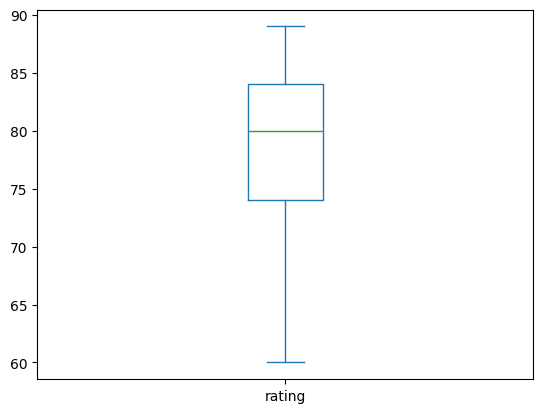

In [301]:
data['rating'].plot(kind='box')

In [302]:
data['rating'].fillna(data['rating'].median(),inplace=True)

In [303]:
data['sim'].value_counts()

,count
sim,
"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",324
"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",268
"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",155
"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",54
"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster",52
"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",46
"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster",46
Dual Sim,13
"Dual Sim, 3G, 4G, Wi-Fi",9


In [304]:
data['has_5G']= data['sim'].str.contains('5G',regex=True)

In [305]:
data['has_5G'].value_counts()

,count
has_5G,
True,549
False,471


In [306]:
data['has_nfc']=data['sim'].str.contains('NFC',regex=True)

In [307]:
data['has_nfc'].value_counts()

,count
has_nfc,
False,627
True,393


In [308]:
data['has_IR_Blaster']=data['sim'].str.contains('IR Blaster',regex=True)

In [309]:
data.head(5)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,has_5G,has_nfc,has_IR_Blaster
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False


In [310]:
data.drop(columns=['sim'],inplace=True)

In [311]:
data['processor'].sample(15)

,processor
27,"Bionic A16, Hexa Core Processor"
726,"Snapdragon 888, Octa Core, 2.84 GHz Processor"
843,"Snapdragon 8 Gen1, Octa Core, 3 GHz Processor"
644,"Helio P35, Octa Core, 2.3 GHz Processor"
761,"Snapdragon 8 Gen1 , Octa Core, 3 GHz Processor"
642,"Snapdragon 8 Gen1, Octa Core, 3 GHz Processor"
286,"Dimensity 1080, Octa Core, 2.6 GHz Processor"
939,"Snapdragon 870 , Octa Core, 3.2 GHz Processor"
495,"Snapdragon 870, Octa Core, 3.2 GHz Processor"
186,"Dimensity 8200, Octa Core, 3.1 GHz Processor"


In [312]:
data['processor'] = data['processor'].str.lower()  # Convert to lowercase

data['processor_brand'] = data['processor'].str.extract(r'(snapdragon|dimensity|exynos|helio|unisoc|tiger)')


In [314]:
## makin new core column

data['core']=data['processor'].str.extract(r'(octa core|quad core)')
data['core']=data['core'].map({'octa core': 8 , 'quad core': 4})

In [315]:
data['core'].value_counts()

,count
core,
8.0,899
4.0,39


In [316]:
data['processor_speed'] = data['processor'].str.extract(r'(\d+(\.\d+)?)\s*ghz')[0].astype(float)


In [317]:
data['processor_speed'].sample(5)

,processor_speed
894,2.84
310,2.00
300,2.30
559,3.00
169,2.40


In [318]:
data.drop(columns=['processor'],inplace=True)

In [319]:
data.head()

,model,price,rating,ram,battery,display,camera,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed
0,OnePlus 11 5G,"₹54,999",89.0,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,3.2
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,2.4
3,Motorola Moto G62 5G,"₹14,999",81.0,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2
4,Realme 10 Pro Plus,"₹24,999",82.0,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,2.6


In [320]:
## making internal column for inbuilt internal memory (rom)
data['internal_memory'] = data['ram'].str.extract(r'(\d+)\s*GB inbuilt')[0]
data['internal_memory'] = data['internal_memory'].fillna(0).astype(int)


In [321]:
# making new col for inbuit ram
data['RAM']=data['ram'].str.extract(r'(\d+)')

In [322]:
data.drop(columns=['ram'],inplace=True)

In [323]:
data.head()



,model,price,rating,battery,display,camera,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM
0,OnePlus 11 5G,"₹54,999",89.0,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,3.2,256,12
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6
2,Samsung Galaxy A14 5G,"₹16,499",75.0,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,2.4,64,4
3,Motorola Moto G62 5G,"₹14,999",81.0,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6
4,Realme 10 Pro Plus,"₹24,999",82.0,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,2.6,128,6


In [324]:
data['battery']

,battery
0,5000 mAh Battery with 100W Fast Charging
1,5000 mAh Battery with 33W Fast Charging
2,5000 mAh Battery with 15W Fast Charging
3,5000 mAh Battery with Fast Charging
4,5000 mAh Battery with 67W Fast Charging
...,...
1015,5000 mAh Battery with 68.2W Fast Charging
1016,5000 mAh Battery with 22.5W Fast Charging
1017,5080 mAh Battery with 67W Fast Charging
1018,5000 mAh Battery with Fast Charging


In [325]:
data['battery_capacity']=data['battery'].str.extract(r'(\d+)')

In [326]:
data['fast_charging'] = data['battery'].str.contains('Fast Charging', case=False, na=False).map({True: 'Yes', False: 'No'})


In [327]:
data.drop(columns=['battery'],inplace=True)

In [328]:
data.head()

,model,price,rating,display,camera,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,battery_capacity,fast_charging
0,OnePlus 11 5G,"₹54,999",89.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,3.2,256,12,5000,Yes
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,2.4,64,4,5000,Yes
3,Motorola Moto G62 5G,"₹14,999",81.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes
4,Realme 10 Pro Plus,"₹24,999",82.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,2.6,128,6,5000,Yes


In [329]:
data['screen_size']=data['display'].str.extract(r'(\d+\.\d+|\d+)')

In [330]:
data['display'].sample(5)

,display
782,"6.51 inches, 720 x 1600 px Display with Water ..."
45,"6.6 inches, 1080 x 2400 px, 120 Hz Display wit..."
681,"6.5 inches, 1080 x 2340 px Display"
691,"6.58 inches, 1080 x 2400 px, 90 Hz Display wit..."
210,"6.7 inches, 1290 x 2796 px, 120 Hz Display"


In [331]:
data[['x_res', 'y_res']] = data['display'].str.extract(r'(\d+)\s*x\s*(\d+)')  ## extracted vertial resolution and horizontal resolution


In [332]:
data.head(5)

,model,price,rating,display,camera,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,battery_capacity,fast_charging,screen_size,x_res,y_res
0,OnePlus 11 5G,"₹54,999",89.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,3.2,256,12,5000,Yes,6.7,1440,3216
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.59,1080,2412
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,2.4,64,4,5000,Yes,6.6,1080,2408
3,Motorola Moto G62 5G,"₹14,999",81.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.55,1080,2400
4,Realme 10 Pro Plus,"₹24,999",82.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,2.6,128,6,5000,Yes,6.7,1080,2412


In [333]:
data.drop(columns=['display'],inplace=True)

In [334]:
data.head()

,model,price,rating,camera,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,battery_capacity,fast_charging,screen_size,x_res,y_res
0,OnePlus 11 5G,"₹54,999",89.0,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,3.2,256,12,5000,Yes,6.7,1440,3216
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.59,1080,2412
2,Samsung Galaxy A14 5G,"₹16,499",75.0,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,2.4,64,4,5000,Yes,6.6,1080,2408
3,Motorola Moto G62 5G,"₹14,999",81.0,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.55,1080,2400
4,Realme 10 Pro Plus,"₹24,999",82.0,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,2.6,128,6,5000,Yes,6.7,1080,2412


In [335]:
data['camera'].sample(5)

,camera
974,64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...
647,"Memory Card Supported, upto 32 GB"
1006,16 MP + 13 MP + 13 MP Triple Rear & 8 MP Front...
104,48 MP Quad Rear & 16 MP Front Camera
529,50 MP + 5 MP + 2 MP Triple Rear & 16 MP Front ...


In [336]:
data['rear_camera'] = data['camera'].str.extract(r'(\bDual|\bTriple|\bQuad)')[0]
mapping = {'Dual': 2, 'Triple': 3, 'Quad': 4}
data['rear_camera'] = data['rear_camera'].map(mapping).fillna(1).astype(int)  # Default 1 if no match



In [337]:

# Extract primary camera megapixel (first MP value in the rear camera section)
data['primary_camera'] = data['camera'].str.extract(r'(\d+)\s*MP')[0].fillna(0).astype(int)

# Extract front camera megapixel (last MP value in the string)
data['front_camera'] = data['camera'].str.extract(r'(\d+)\s*MP Front')[0].fillna(0).astype(int)

In [338]:
data.drop(columns=['camera'],inplace=True)

In [339]:
data

,model,price,rating,card,os,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,...,internal_memory,RAM,battery_capacity,fast_charging,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera
0,OnePlus 11 5G,"₹54,999",89.0,Memory Card Not Supported,Android v13,True,True,False,snapdragon,8.0,...,256,12,5000,Yes,6.7,1440,3216,3,50,16
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,...,128,6,5000,Yes,6.59,1080,2412,3,64,16
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Memory Card Supported, upto 1 TB",Android v13,True,False,False,exynos,8.0,...,64,4,5000,Yes,6.6,1080,2408,3,50,13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Memory Card (Hybrid), upto 1 TB",Android v12,True,False,False,snapdragon,8.0,...,128,6,5000,Yes,6.55,1080,2400,3,50,16
4,Realme 10 Pro Plus,"₹24,999",82.0,Memory Card Not Supported,Android v13,True,False,False,dimensity,8.0,...,128,6,5000,Yes,6.7,1080,2412,3,108,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,Android v12,No FM Radio,True,False,False,snapdragon,8.0,...,128,8,5000,Yes,6.67,1080,2460,3,64,16
1016,Honor X8 5G,"₹14,990",75.0,"Memory Card Supported, upto 1 TB",Android v11,True,False,False,snapdragon,8.0,...,128,6,5000,Yes,6.5,720,1600,3,48,8
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,Memory Card Not Supported,Android v12,True,True,True,dimensity,8.0,...,256,8,5080,Yes,6.6,1080,2460,3,64,16
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Memory Card Supported, upto 1 TB",Android v12,True,True,False,snapdragon,8.0,...,128,6,5000,Yes,6.8,1080,2400,3,108,32


In [340]:
data['os_version']=data['os'].str.extract(r'(\d+)').fillna(0)

In [341]:
data['os'].sample(10)

,os
589,Android v11
77,Android v13
143,Android v8.1 (Oreo)
730,Android v11
504,Memory Card Not Supported
232,Android v12
733,Android v11
503,Android v11
265,Android v12
448,No FM Radio


In [342]:
# Create 'operatingsys' column based on 'os'
data['operatingsys'] = data['os'].apply(lambda x:
    'Android' if pd.notna(x) and 'Android' in x else
    'iOS' if pd.notna(x) and 'iOS' in x else
    'Other'
)



In [343]:
data.drop(columns=['os'],inplace=True)

In [344]:
data.head()

,model,price,rating,card,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,...,battery_capacity,fast_charging,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera,os_version,operatingsys
0,OnePlus 11 5G,"₹54,999",89.0,Memory Card Not Supported,True,True,False,snapdragon,8.0,3.2,...,5000,Yes,6.7,1440,3216,3,50,16,13,Android
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Memory Card (Hybrid), upto 1 TB",True,False,False,snapdragon,8.0,2.2,...,5000,Yes,6.59,1080,2412,3,64,16,12,Android
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Memory Card Supported, upto 1 TB",True,False,False,exynos,8.0,2.4,...,5000,Yes,6.6,1080,2408,3,50,13,13,Android
3,Motorola Moto G62 5G,"₹14,999",81.0,"Memory Card (Hybrid), upto 1 TB",True,False,False,snapdragon,8.0,2.2,...,5000,Yes,6.55,1080,2400,3,50,16,12,Android
4,Realme 10 Pro Plus,"₹24,999",82.0,Memory Card Not Supported,True,False,False,dimensity,8.0,2.6,...,5000,Yes,6.7,1080,2412,3,108,16,13,Android


In [345]:
data['extended_memory']=data['card'].apply(lambda x: 'no' if pd.notna(x) and 'Not' in x else 'Yes')

In [346]:
data['extended_memory'].value_counts()

,count
extended_memory,
Yes,908
no,112


In [347]:
data.drop(columns=['card'],inplace=True)

In [348]:
data.head()

,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,...,fast_charging,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera,os_version,operatingsys,extended_memory
0,OnePlus 11 5G,"₹54,999",89.0,True,True,False,snapdragon,8.0,3.2,256,...,Yes,6.7,1440,3216,3,50,16,13,Android,no
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,True,False,False,snapdragon,8.0,2.2,128,...,Yes,6.59,1080,2412,3,64,16,12,Android,Yes
2,Samsung Galaxy A14 5G,"₹16,499",75.0,True,False,False,exynos,8.0,2.4,64,...,Yes,6.6,1080,2408,3,50,13,13,Android,Yes
3,Motorola Moto G62 5G,"₹14,999",81.0,True,False,False,snapdragon,8.0,2.2,128,...,Yes,6.55,1080,2400,3,50,16,12,Android,Yes
4,Realme 10 Pro Plus,"₹24,999",82.0,True,False,False,dimensity,8.0,2.6,128,...,Yes,6.7,1080,2412,3,108,16,13,Android,no


In [349]:
data['model'].sample(20)

,model
85,Motorola Edge 30 5G
790,Xiaomi Mi Mix Fold
666,itel Vision 3
40,OnePlus Nord CE 3 5G
398,Xiaomi Redmi Note 11 5G
805,Samsung Galaxy S9 Plus (128GB)
747,Vivo V19 (8GB RAM + 256GB)
819,OnePlus Nord N300
987,OnePlus Z
875,Huawei Nova Y61


In [350]:
def brand_name(brand):
    brand = brand.strip().title()  # Normalize case

    # Dictionary to map sub-brands correctly
    brand_mappings = {
        "Apple": "Apple",
        "Realme": "Realme",
        "Samsung": "Samsung",
        "Oppo": "Oppo",
        "Vivo": "Vivo",
        "Google": "Google",
        "Poco": "POCO",  # POCO is a Xiaomi sub-brand
        "Xiaomi": "Xiaomi",
        "Redmi": "Xiaomi",  # Redmi should also be classified as Xiaomi
        "Oneplus": "OnePlus",
        "Infinix": "Infinix",
        "Tecno": "Tecno",
        "Motorola": "Motorola",  # Fixed spelling
        "Blackzone": "BlackZone",
        "Honor": "Honor",
        "Huawei": "Huawei",
        "Nokia": "Nokia",
        "Asus": "Asus",
        "Lenovo": "Lenovo",
        "Nothing": "Nothing",  # For Nothing Phone 1, 2, etc.
    }

    # Check if any brand starts the model name
    for key in brand_mappings.keys():
        if brand.startswith(key):
            return brand_mappings[key]

    return "Other"  # If no match found


In [351]:

data['brand'] = data['model'].apply(brand_name)


In [352]:
data.drop(columns=['model'],inplace=True)

<Axes: xlabel='brand'>

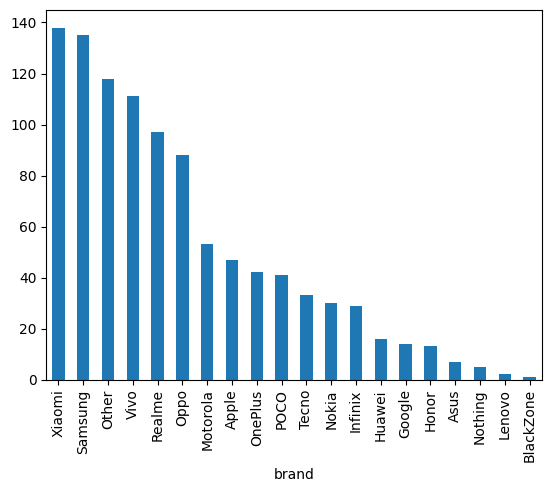

In [353]:
data['brand'].value_counts().plot(kind='bar')

In [354]:
data.head()

,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,...,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera,os_version,operatingsys,extended_memory,brand
0,"₹54,999",89.0,True,True,False,snapdragon,8.0,3.2,256,12,...,6.7,1440,3216,3,50,16,13,Android,no,OnePlus
1,"₹19,989",81.0,True,False,False,snapdragon,8.0,2.2,128,6,...,6.59,1080,2412,3,64,16,12,Android,Yes,OnePlus
2,"₹16,499",75.0,True,False,False,exynos,8.0,2.4,64,4,...,6.6,1080,2408,3,50,13,13,Android,Yes,Samsung
3,"₹14,999",81.0,True,False,False,snapdragon,8.0,2.2,128,6,...,6.55,1080,2400,3,50,16,12,Android,Yes,Motorola
4,"₹24,999",82.0,True,False,False,dimensity,8.0,2.6,128,6,...,6.7,1080,2412,3,108,16,13,Android,no,Realme


In [357]:
data['price']=data['price'].str.replace('₹','').str.replace(',','').astype(int)

In [359]:
data.head()

,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,...,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera,os_version,operatingsys,extended_memory,brand
0,54999,89.0,True,True,False,snapdragon,8.0,3.2,256,12,...,6.7,1440,3216,3,50,16,13,Android,no,OnePlus
1,19989,81.0,True,False,False,snapdragon,8.0,2.2,128,6,...,6.59,1080,2412,3,64,16,12,Android,Yes,OnePlus
2,16499,75.0,True,False,False,exynos,8.0,2.4,64,4,...,6.6,1080,2408,3,50,13,13,Android,Yes,Samsung
3,14999,81.0,True,False,False,snapdragon,8.0,2.2,128,6,...,6.55,1080,2400,3,50,16,12,Android,Yes,Motorola
4,24999,82.0,True,False,False,dimensity,8.0,2.6,128,6,...,6.7,1080,2412,3,108,16,13,Android,no,Realme


In [360]:
pd.set_option('display.max_columns', None)

In [361]:
data.head()

,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_brand,core,processor_speed,internal_memory,RAM,battery_capacity,fast_charging,screen_size,x_res,y_res,rear_camera,primary_camera,front_camera,os_version,operatingsys,extended_memory,brand
0,54999,89.0,True,True,False,snapdragon,8.0,3.2,256,12,5000,Yes,6.7,1440,3216,3,50,16,13,Android,no,OnePlus
1,19989,81.0,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.59,1080,2412,3,64,16,12,Android,Yes,OnePlus
2,16499,75.0,True,False,False,exynos,8.0,2.4,64,4,5000,Yes,6.6,1080,2408,3,50,13,13,Android,Yes,Samsung
3,14999,81.0,True,False,False,snapdragon,8.0,2.2,128,6,5000,Yes,6.55,1080,2400,3,50,16,12,Android,Yes,Motorola
4,24999,82.0,True,False,False,dimensity,8.0,2.6,128,6,5000,Yes,6.7,1080,2412,3,108,16,13,Android,no,Realme
